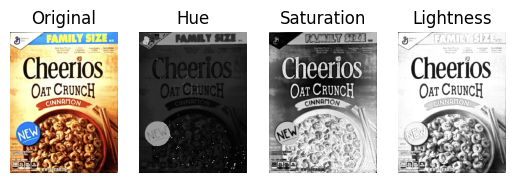

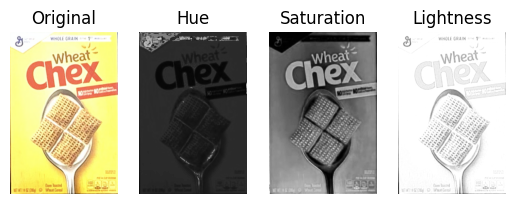

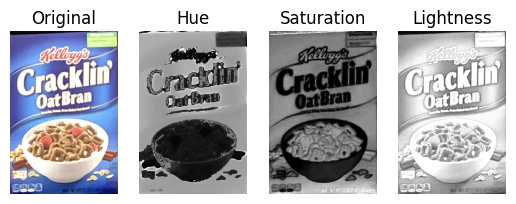

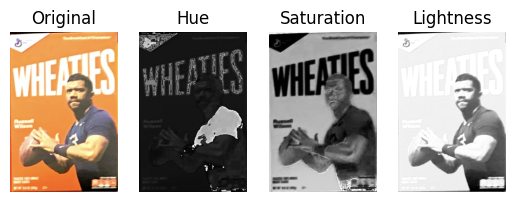

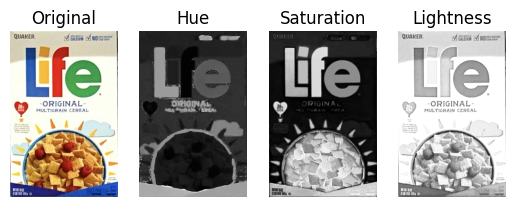

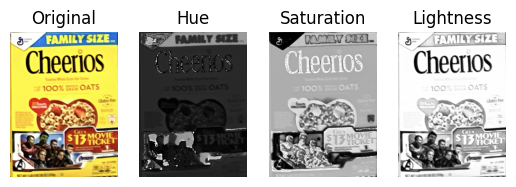

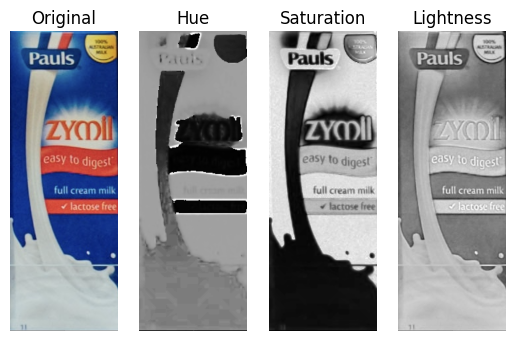

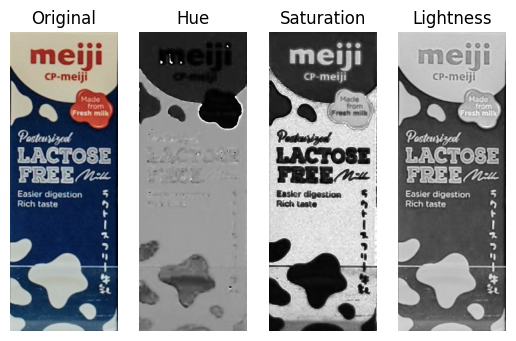

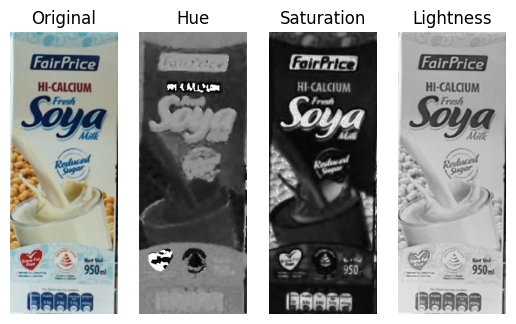

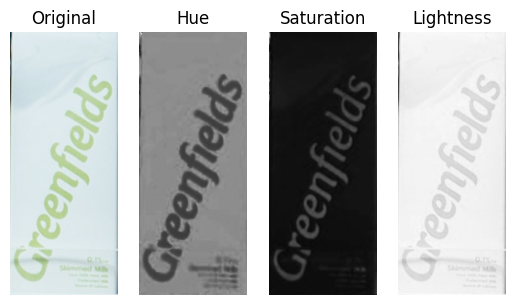

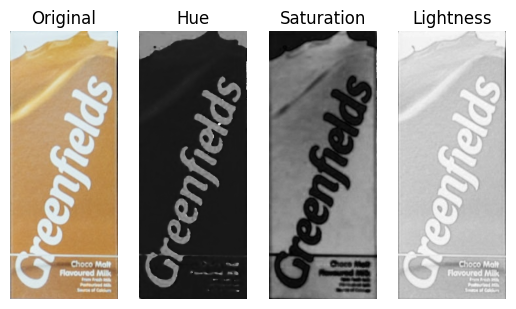

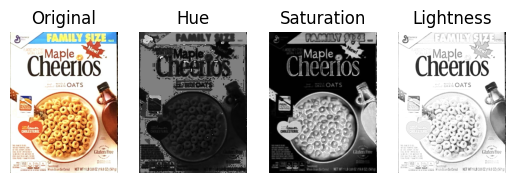

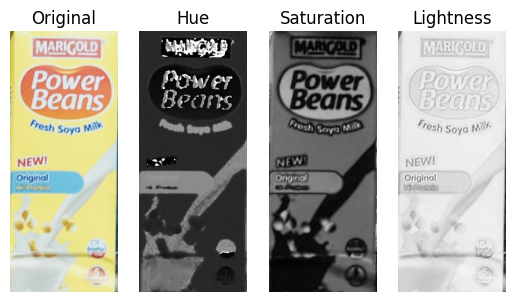

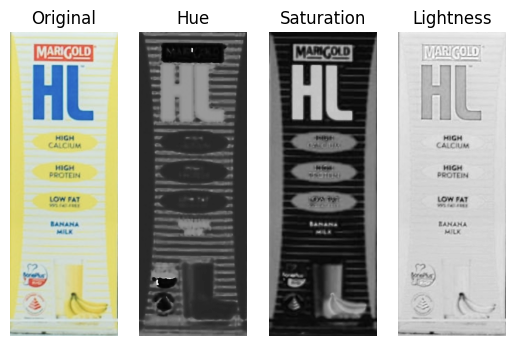

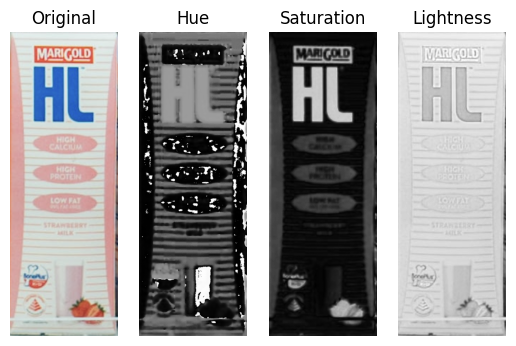

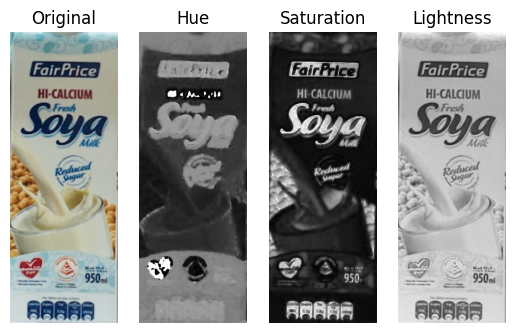

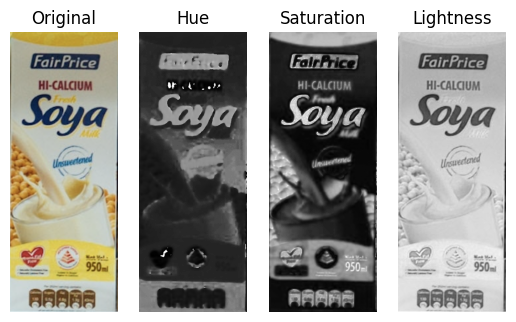

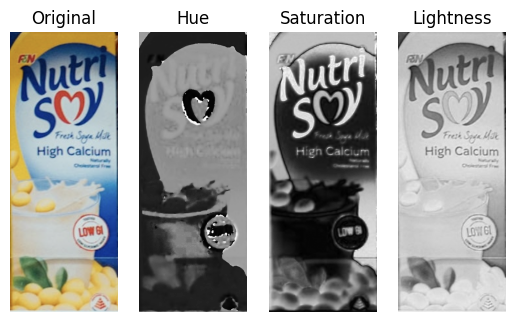

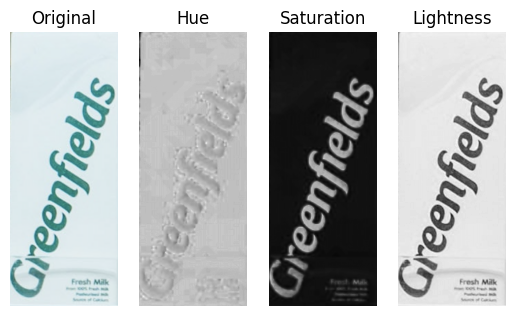

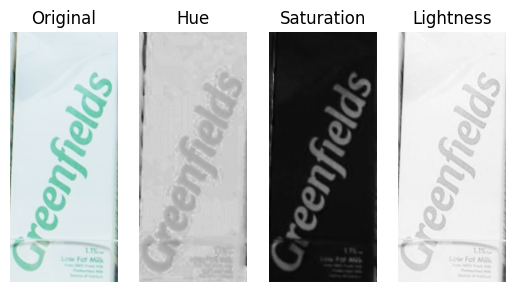

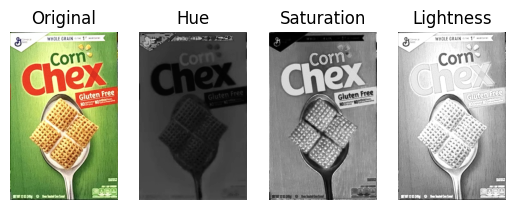

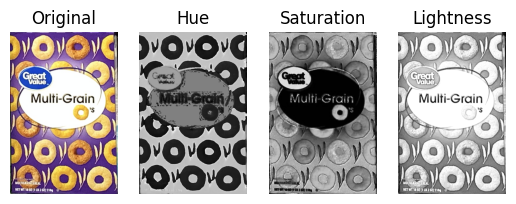

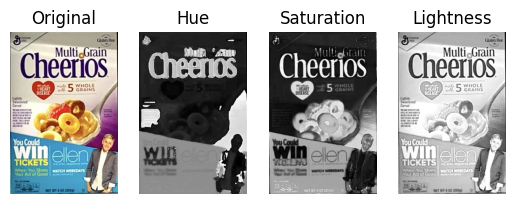

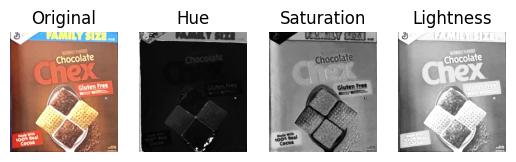

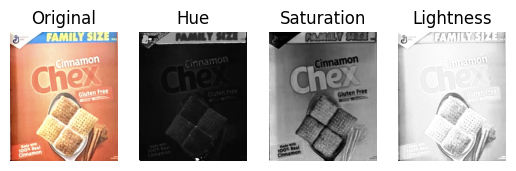

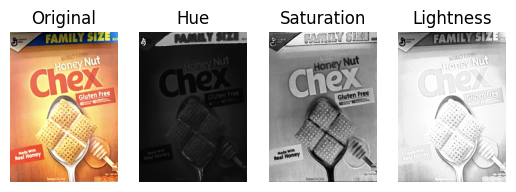

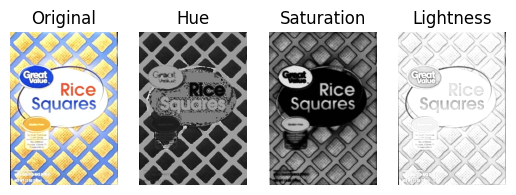

In [13]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
folder = Path("./dataset/models")
for file in folder.glob('*'):
    img = cv2.imread(str(file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)    
    r, g, b = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 4, 2)
    plt.imshow(r, cmap="gray")
    plt.title("Hue")
    plt.axis("off")
    plt.subplot(1, 4, 3)
    plt.imshow(g, cmap="gray")
    plt.title("Saturation")
    plt.axis("off")
    plt.subplot(1, 4, 4)
    plt.imshow(b, cmap="gray")
    plt.title("Lightness")
    plt.axis("off")
    plt.show()


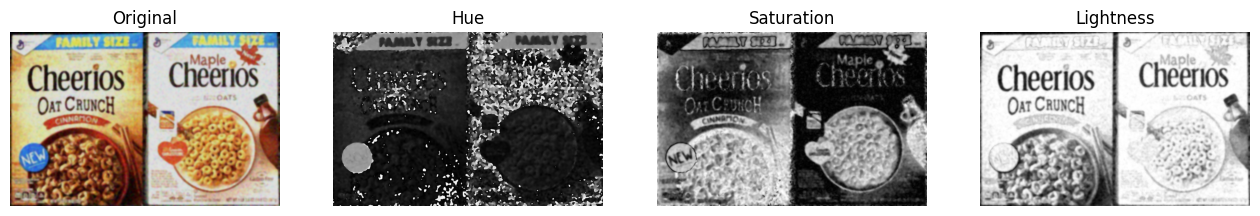

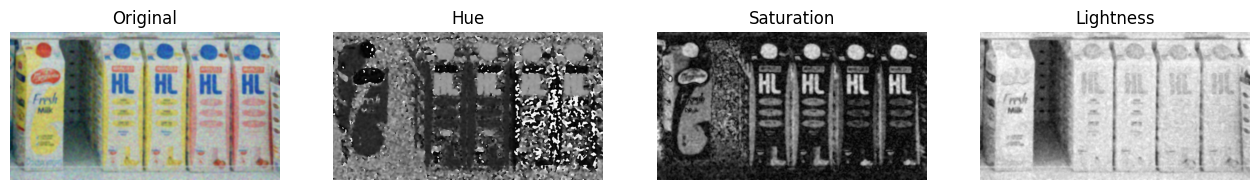

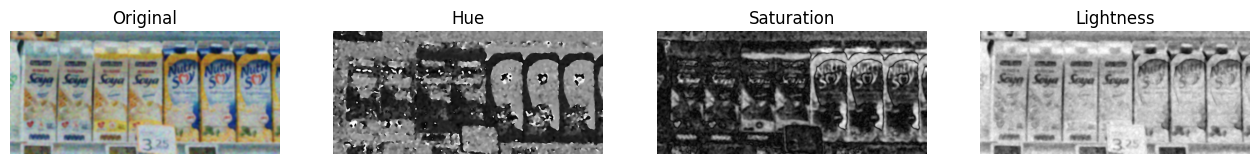

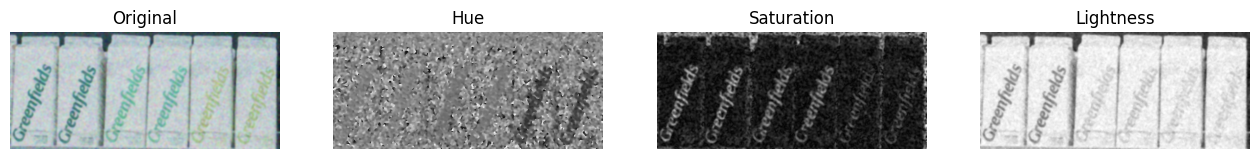

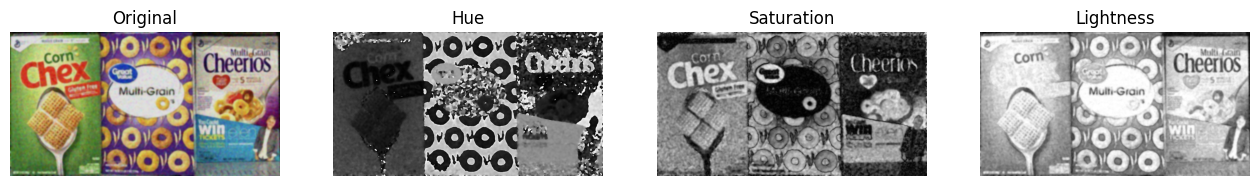

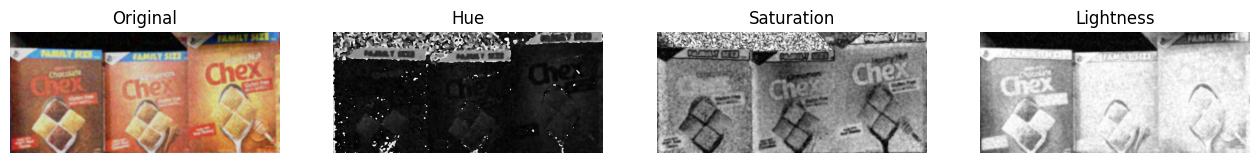

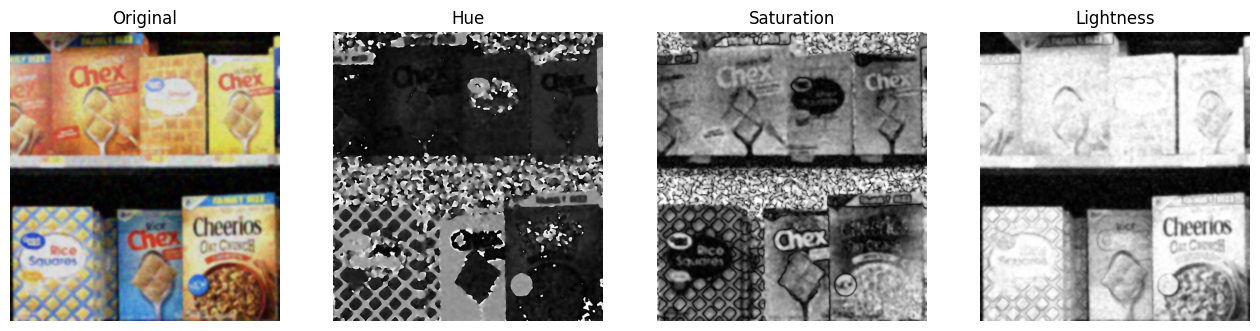

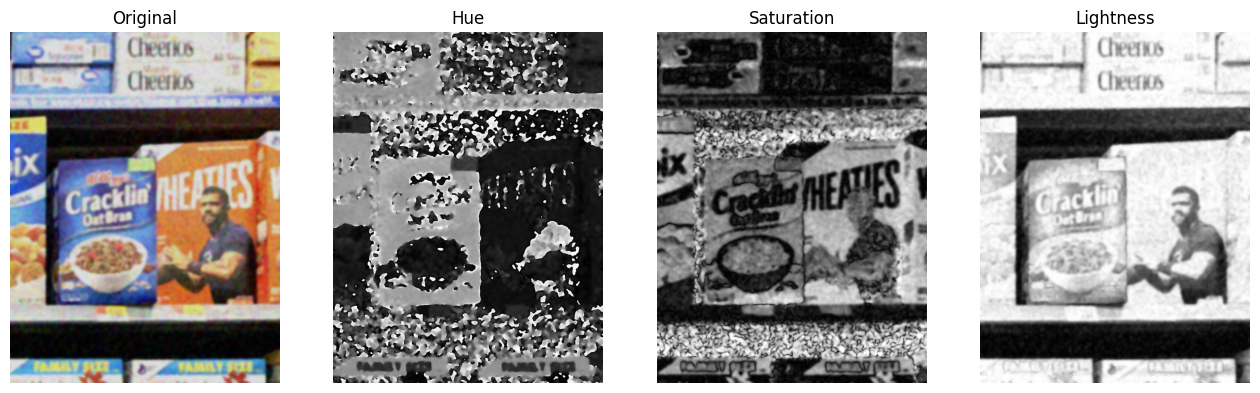

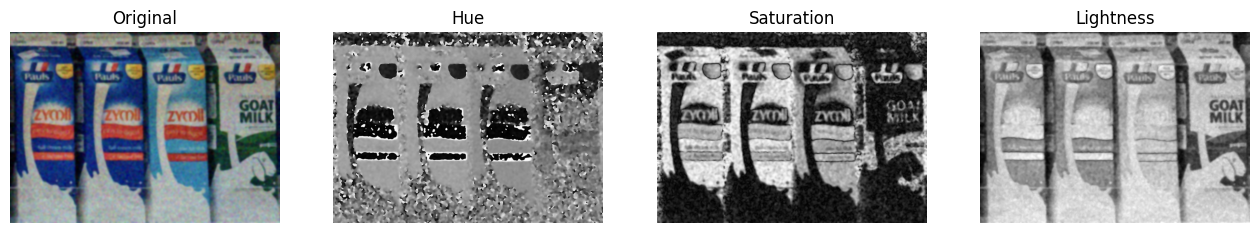

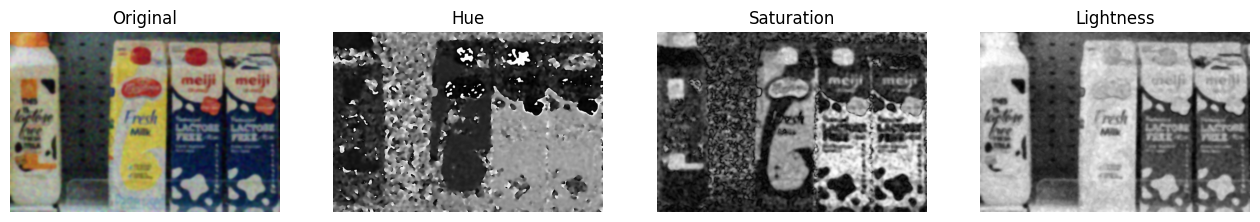

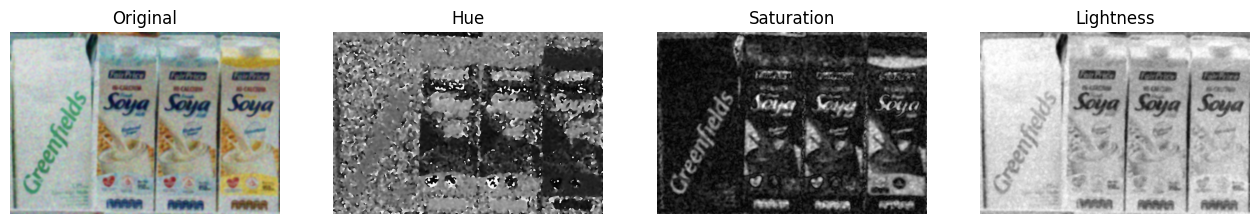

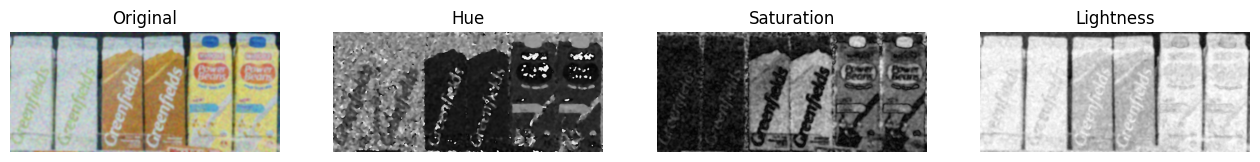

In [16]:
def filter1(image, median_size=9, gaussian_sigma=3):
    image = cv2.medianBlur(image, median_size)
    image = cv2.GaussianBlur(image, (0, 0), gaussian_sigma)
    image = cv2.bilateralFilter(image, 9, 175, 175)
    image = cv2.medianBlur(image, median_size)
    return image

def filter2(image, median_size=3):
    image = cv2.medianBlur(image, median_size)
    image = cv2.bilateralFilter(image, 9, 75, 75)
    return image

def filter3(image, median_size=3):
    image = cv2.medianBlur(image, median_size)
    image = cv2.fastNlMeansDenoisingColored(image, hColor=10)
    return image


folder = Path("./dataset/scenes")
for file in folder.glob('*'):
    img = cv2.imread(str(file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = filter1(img)

    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)    
    r, g, b = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]
    plt.figure(figsize=(16,8))
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")
    plt.subplot(1, 4, 2)
    plt.imshow(r, cmap="gray")
    plt.title("Hue")
    plt.axis("off")
    plt.subplot(1, 4, 3)
    plt.imshow(g, cmap="gray")
    plt.title("Saturation")
    plt.axis("off")
    plt.subplot(1, 4, 4)
    plt.imshow(b, cmap="gray")
    plt.title("Lightness")
    plt.axis("off")
    plt.show()